# Notebook for Tests and Quick Looks

In [7]:
import xarray as xr
import cmocean as cmo

from datetime import datetime, timedelta

import numpy as np

import parcels

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt


In [2]:
file = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/Arc22.gridded_100m_oce_2006_2009_new.nc"
ds = xr.open_dataset(file)

In [11]:
ds

<xarray.Dataset> Size: 39GB
Dimensions:      (time: 1460, latitude: 825, longitude: 800, depth_coord: 1)
Coordinates:
  * latitude     (latitude) float64 7kB 75.0 75.01 75.02 ... 82.48 82.49 82.5
  * longitude    (longitude) float64 6kB -20.0 -19.95 -19.9 ... 19.9 19.95 20.0
  * depth_coord  (depth_coord) float64 8B 100.0
  * time         (time) datetime64[ns] 12kB 2006-01-02 2006-01-03 ... 2010-01-01
Data variables:
    day          (time) float64 12kB ...
    thetao       (time, depth_coord, latitude, longitude) float64 8GB ...
    so           (time, depth_coord, latitude, longitude) float64 8GB ...
    uo           (time, depth_coord, latitude, longitude) float64 8GB ...
    vo           (time, depth_coord, latitude, longitude) float64 8GB ...
    zos          (time, latitude, longitude) float64 8GB ...
Attributes:
    history:                   Tue Sep 26 11:38:33 2017: ncap -O -s day=time/...
    nco_openmp_thread_number:  1

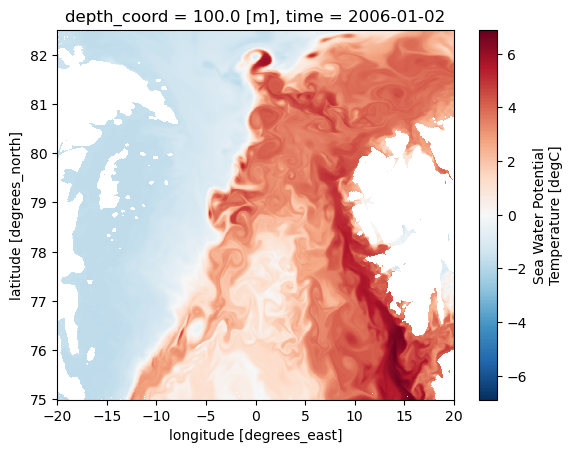

In [4]:
ds.thetao.isel(time=0).plot()

In [6]:
ds.uo.shape, ds.vo.shape, ds.thetao.shape

((1460, 1, 825, 800), (1460, 1, 825, 800), (1460, 1, 825, 800))

In [13]:
inpath = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/"
file   = "Arc22.gridded_100m_oce_2006_2009_new.nc"
example_dataset_folder = inpath
fname = f"{example_dataset_folder}/Arc22.gridded_100m_oce_2006_2009_n*.nc"
filenames = {"U": fname, "V": fname}

In [ ]:
# In the GlobCurrent data the dimensions are also called 'lon', 'lat' and 'time
dimensions = {
    "U": {"lat": "lat", "lon": "lon", "time": "time"},
    "V": {"lat": "lat", "lon": "lon", "time": "time"},
}

In [10]:
filenames = {
    'U': inpath +file,
    'V': inpath +file,
}

variables = {
    'U': 'uo',
    'V': 'vo',
}

dimensions = {
    'lon': 'longitude',
    'lat': 'latitude',
    'time': 'time',
    'depth': 'depth_coord',
}

fieldset = parcels.FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

In [14]:
np.diff(ds.latitude)

array([0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910

In [14]:
filenames = {
    'U': inpath+file,
    'V': inpath+file,
}

variables = {
    'U': 'uo',
    'V': 'vo',
}

dimensions = {
    'lon': 'longitude',
    'lat': 'latitude',
    'time': 'time',
    'depth': 'depth_coord',
}

fieldset = parcels.FieldSet.from_netcdf(
    filenames,
    variables,
    dimensions,
    indices={'depth': [0]},  # fixed 100m layer
    allow_time_extrapolation=True
)

In [18]:
pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    lon=[0.0],     # your test longitude
    lat=[79.0],    # your test latitude (within domain!)
    depth=[100.0]  # match the dataset's depth_coord
)


In [20]:
from parcels import AdvectionRK4  # even though we're doing 2D, 3D is safer here

pset.execute(
    AdvectionRK4,
    runtime=86400 * 5,   # 5 days in seconds
    dt=1800,             # simulation step: 30 min
    output_file=pset.ParticleFile(name="test_output", outputdt=86400)  # daily output
)

INFO: Output files are stored in test_output.zarr.
100%|██████████| 432000.0/432000.0 [00:01<00:00, 343032.33it/s]


In [21]:
pset.show(traj=True, show_time=True)

TypeError: 'bool' object is not callable

In [23]:
data_xarray = xr.open_zarr("test_output.zarr")
data_xarray

<xarray.Dataset> Size: 128B
Dimensions:     (trajectory: 1, obs: 5)
Coordinates:
  * obs         (obs) int32 20B 0 1 2 3 4
  * trajectory  (trajectory) int64 8B 1
Data variables:
    lat         (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
    lon         (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 40B dask.array<chunksize=(1, 1), meta=np.ndarray>
    z           (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [16]:
from parcels import AdvectionRK4  # even though we're doing 2D, 3D is safer here

# --- STEP 1: Set up your particle release locations ---
# Example: 10 particles along a line near lat=78.0

n = 20
lons = np.full(n, 3)        # adjust to match your domain              # all particles at lat 78.0
lats = np.linspace(78, 80, n)
depths = np.full(n, 100.0)           # all at 100m depth (fixed layer)

# --- STEP 2: Create the ParticleSet ---
pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    lon=lons,
    lat=lats,
    depth=depths
)

# --- STEP 3: Run the simulation for 14 days with 30-min timestep ---
pset.execute(
    AdvectionRK4,
    runtime=timedelta(days=30),             # 2 weeks total simulation
    dt=timedelta(minutes=30),               # simulation step
    output_file=pset.ParticleFile(name="parcels_output", outputdt=timedelta(days=1))
)

INFO: Output files are stored in parcels_output.zarr.
100%|██████████| 2592000.0/2592000.0 [00:07<00:00, 334045.89it/s]


In [17]:
ds = xr.open_zarr("parcels_output.zarr")
ds

<xarray.Dataset> Size: 12kB
Dimensions:     (trajectory: 20, obs: 30)
Coordinates:
  * obs         (obs) int32 120B 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * trajectory  (trajectory) int64 160B 20 21 22 23 24 25 ... 34 35 36 37 38 39
Data variables:
    lat         (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    lon         (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 5kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    z           (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4
    parcels_mesh:           spherical
    parcels_version:        3.1.2

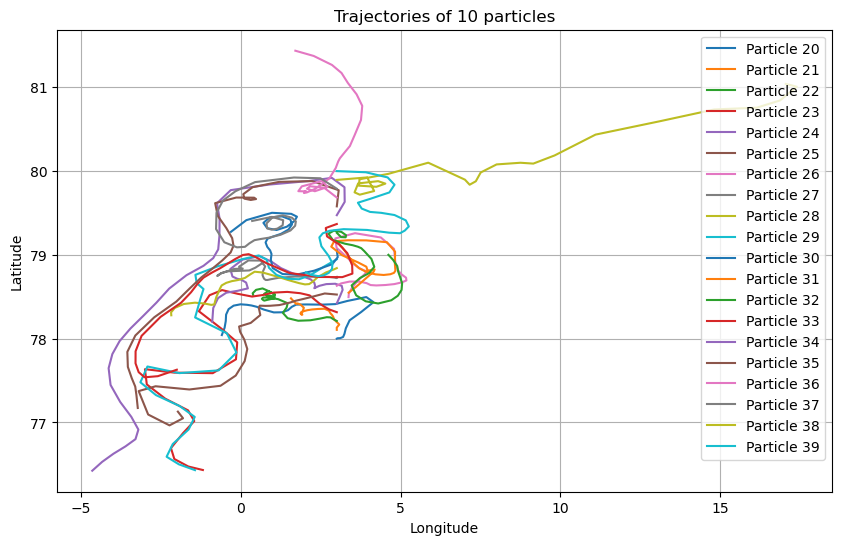

In [18]:
import matplotlib.pyplot as plt

ds = xr.open_zarr("parcels_output.zarr")

plt.figure(figsize=(10,6))
for pid in ds.trajectory:
    plt.plot(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), label=f"Particle {pid.values}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Trajectories of 10 particles")
plt.legend()
plt.grid(True)
plt.show()

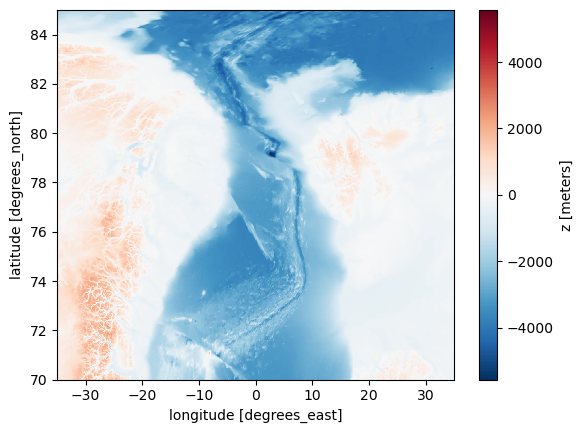

In [10]:
# Load ETOPO1
ds_bath = xr.open_dataset("/albedo/work/user/quraus001/bath/ETOPO_2022_v1_60s_N90W180_bed.nc")

# ETOPO1 uses 'x' and 'y' instead of lon/lat sometimes, and 'z' for depth

# Crop to Fram Strait region
ds_fram_bath = ds_bath.sel(
    lon=slice(-35, 35),    # longitude
    lat=slice(70, 85)      # latitude (note: decreasing!)
)

ds_fram_bath.z.plot()

In [21]:
def get_colormap_colors(colormap='plasma', num_colors=20):
    # Create a linear space of values from 0 to 1
    values = np.linspace(0, 1, num_colors)
    
    # Get the colormap
    cmap = plt.cm.get_cmap(colormap)
    
    # Get the colors corresponding to the values
    colors = [cmap(val) for val in values]
    
    return colors

/tmp/ipykernel_2860347/2998976094.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(colormap)


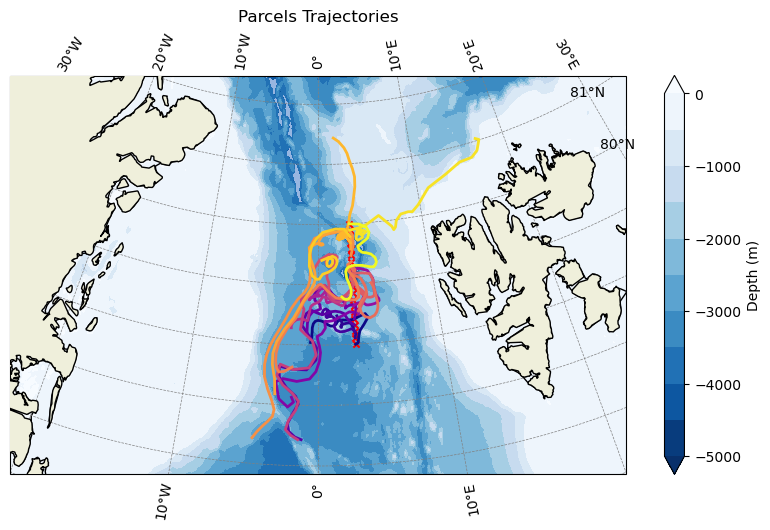

In [22]:
colors = get_colormap_colors(colormap='plasma', num_colors=20)

fig = plt.figure(figsize=(8, 6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

# Set extent for Fram Strait (in degrees; note lat/lon in PlateCarree for setting extent)
ax.set_extent([-20, 20, 75, 82], crs=ccrs.PlateCarree())

# Plot the bathymetry
bathy_data = ds_fram_bath['z']
lon = ds_fram_bath['lon']
lat = ds_fram_bath['lat']

# Contourf or pcolormesh for bathymetry
cs = ax.contourf(
    lon, lat, bathy_data,
    levels=np.arange(-5000, 500, 500),
    cmap="Blues_r",
    extend='both',
    transform=ccrs.PlateCarree()
)

plt.colorbar(cs, ax=ax, orientation='vertical', label='Depth (m)', shrink=0.7)

# Add map features
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
ax.add_feature(cfeature.OCEAN)

# Plot each particle's trajectory
for pid, color in zip(ds.trajectory, colors):
    ax.plot(
        ds.lon.sel(trajectory=pid),
        ds.lat.sel(trajectory=pid),
        transform=ccrs.PlateCarree(),
        label=f"Particle {pid.values}",
        linewidth=2,
        color=color,
    )

# Optional: mark starting locations
ax.scatter(
    ds.lon.isel(obs=0),
    ds.lat.isel(obs=0),
    color='red',
    s=20,
    transform=ccrs.PlateCarree(),
    label="Start",
    marker="x"
)

plt.title("Parcels Trajectories")
#plt.legend()
plt.tight_layout()
plt.show()